# Exploratory Data Analysis on a Retail Sales Data

### Questions

Let's start by extracting the following insights from our dataset

- Sales trend: Monthly

- Product performance: Top selling products and price impact

- Geographical Insights: Regional Performance

- Sales Distribution: Order Quantity Distribution and Revenue Distribution


In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load the data
df= pd.read_csv('C:/Users/WOYES/Desktop/HNG/sales_data_sample.csv',encoding='latin1', index_col=0)

# preview the dataframe
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
# Print dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2823 entries, 10107 to 10414
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QUANTITYORDERED   2823 non-null   int64  
 1   PRICEEACH         2823 non-null   float64
 2   ORDERLINENUMBER   2823 non-null   int64  
 3   SALES             2823 non-null   float64
 4   ORDERDATE         2823 non-null   object 
 5   STATUS            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   MONTH_ID          2823 non-null   int64  
 8   YEAR_ID           2823 non-null   int64  
 9   PRODUCTLINE       2823 non-null   object 
 10  MSRP              2823 non-null   int64  
 11  PRODUCTCODE       2823 non-null   object 
 12  CUSTOMERNAME      2823 non-null   object 
 13  PHONE             2823 non-null   object 
 14  ADDRESSLINE1      2823 non-null   object 
 15  ADDRESSLINE2      302 non-null    object 
 16  CITY              2823 non-null   object 


The dataset comprises 2823 entries across 24 columns, with complete data in 20 columns. However, ADDRESSLINE2,  STATE,  POSTALCODE, and TERRITORY columns have significant missing values, necessitating data imputation or handling strategies for analyses involving these variables.

Next up, we will find out the percentage of missing entries for each column

In [4]:
# prints % missing values
(df.isnull().sum()/len(df) *100).round(2)

QUANTITYORDERED      0.00
PRICEEACH            0.00
ORDERLINENUMBER      0.00
SALES                0.00
ORDERDATE            0.00
STATUS               0.00
QTR_ID               0.00
MONTH_ID             0.00
YEAR_ID              0.00
PRODUCTLINE          0.00
MSRP                 0.00
PRODUCTCODE          0.00
CUSTOMERNAME         0.00
PHONE                0.00
ADDRESSLINE1         0.00
ADDRESSLINE2        89.30
CITY                 0.00
STATE               52.64
POSTALCODE           2.69
COUNTRY              0.00
TERRITORY           38.04
CONTACTLASTNAME      0.00
CONTACTFIRSTNAME     0.00
DEALSIZE             0.00
dtype: float64

Let's drop some features that add no significant value to our analysis. Thus some of the missing values features will be taken care along

In [5]:
# drop out insignificant features
df.drop(columns=['PHONE','STATUS','CONTACTFIRSTNAME', 'CONTACTLASTNAME','PRODUCTCODE','STATE','TERRITORY','POSTALCODE','ORDERLINENUMBER',
                'ADDRESSLINE1','ADDRESSLINE2'],inplace=True)
# print dataset overview
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2823 entries, 10107 to 10414
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   SALES            2823 non-null   float64
 3   ORDERDATE        2823 non-null   object 
 4   QTR_ID           2823 non-null   int64  
 5   MONTH_ID         2823 non-null   int64  
 6   YEAR_ID          2823 non-null   int64  
 7   PRODUCTLINE      2823 non-null   object 
 8   MSRP             2823 non-null   int64  
 9   CUSTOMERNAME     2823 non-null   object 
 10  CITY             2823 non-null   object 
 11  COUNTRY          2823 non-null   object 
 12  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 308.8+ KB


Change the datatype of ORDERDATE to datetime 

In [6]:
# change to datetime
df['ORDERDATE']=pd.to_datetime(df['ORDERDATE'])

# reprint the dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2823 entries, 10107 to 10414
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   QUANTITYORDERED  2823 non-null   int64         
 1   PRICEEACH        2823 non-null   float64       
 2   SALES            2823 non-null   float64       
 3   ORDERDATE        2823 non-null   datetime64[ns]
 4   QTR_ID           2823 non-null   int64         
 5   MONTH_ID         2823 non-null   int64         
 6   YEAR_ID          2823 non-null   int64         
 7   PRODUCTLINE      2823 non-null   object        
 8   MSRP             2823 non-null   int64         
 9   CUSTOMERNAME     2823 non-null   object        
 10  CITY             2823 non-null   object        
 11  COUNTRY          2823 non-null   object        
 12  DEALSIZE         2823 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 308.8+ KB


In [7]:
#  summary statistics of the key quantitative variables
data = ['QUANTITYORDERED','PRICEEACH','SALES','MSRP']
df[data].describe().T

,count,mean,std,min,25%,50%,75%,max
QUANTITYORDERED,2823.0,35.092809,9.741443,6.00,27.00,35.0,43.0,97.0
PRICEEACH,2823.0,83.658544,20.174277,26.88,68.86,95.7,100.0,100.0
SALES,2823.0,3553.889072,1841.865106,482.13,2203.43,3184.8,4508.0,14082.8
MSRP,2823.0,100.715551,40.187912,33.00,68.00,99.0,124.0,214.0


#### Q1. Sales Trend: Monthly 

In [8]:
# check the numbers of month per year
df.groupby('YEAR_ID')['MONTH_ID'].max()

YEAR_ID
2003    12
2004    12
2005     5
Name: MONTH_ID, dtype: int64

We found out that 2005 has only five month of sales records. Thus, let's visualize the monthly sales throughout the years

In [9]:
# change the ORDERDATE column to month and datatype to string
df['Month'] = df['ORDERDATE'].dt.to_period('M').astype(str)

# convert the SALES column to million
df['Sales (million)']= df['SALES']/1000000

In [10]:
# print the total sales per month for each year
Total_sales=df.groupby('Month')[['Sales (million)']].sum().reset_index()
Total_sales.head(10)

,Month,Sales (million)
0,2003-01,0.129754
1,2003-02,0.140836
2,2003-03,0.174505
3,2003-04,0.201610
4,2003-05,0.192673
5,2003-06,0.168083
6,2003-07,0.187732
7,2003-08,0.197809
8,2003-09,0.263973
9,2003-10,0.568291


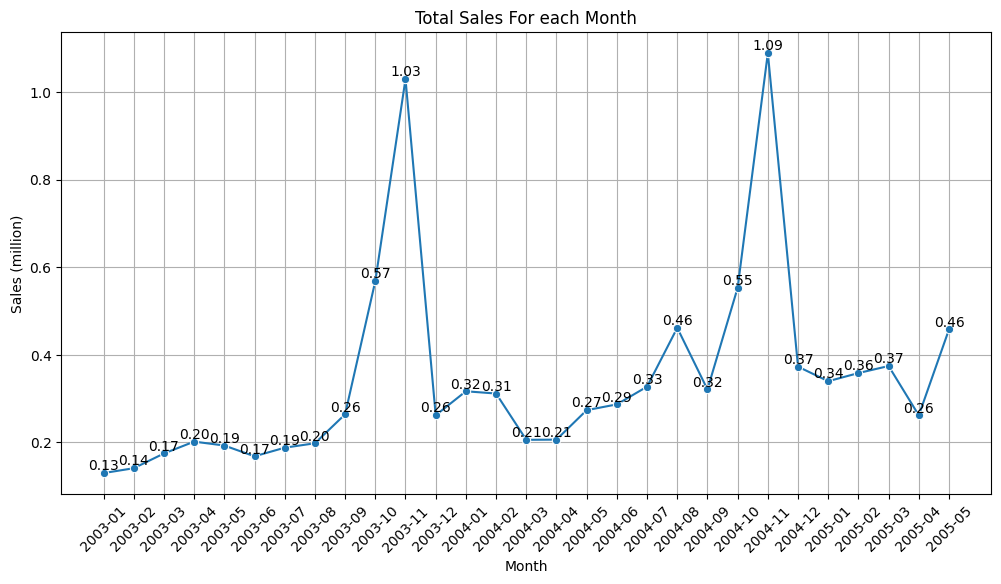

In [11]:
# visualize each monthly sales per year
plt.figure(figsize=(12,6))

sns.lineplot(x='Month',y='Sales (million)',data=Total_sales, marker='o')

plt.title('Total Sales For each Month')
plt.xticks(rotation=45)
plt.grid(True)

# label each sales point per month
for x, y in Total_sales.iterrows():
    plt.text(y['Month'], y['Sales (million)'], f'{y["Sales (million)"]:.2f}',  ha='center', va='bottom')

We see the sales increase every October and a peak in November for the two years. You can give several reasons for that, however.

#### Q2. Product performance: Top selling products and price impact

Let's identify the product line that generate the most revenue

In [12]:
top_prod= df.groupby('PRODUCTLINE')['SALES'].sum().reset_index()
top_prod

,PRODUCTLINE,SALES
0,Classic Cars,3919615.66
1,Motorcycles,1166388.34
2,Planes,975003.57
3,Ships,714437.13
4,Trains,226243.47
5,Trucks and Buses,1127789.84
6,Vintage Cars,1903150.84


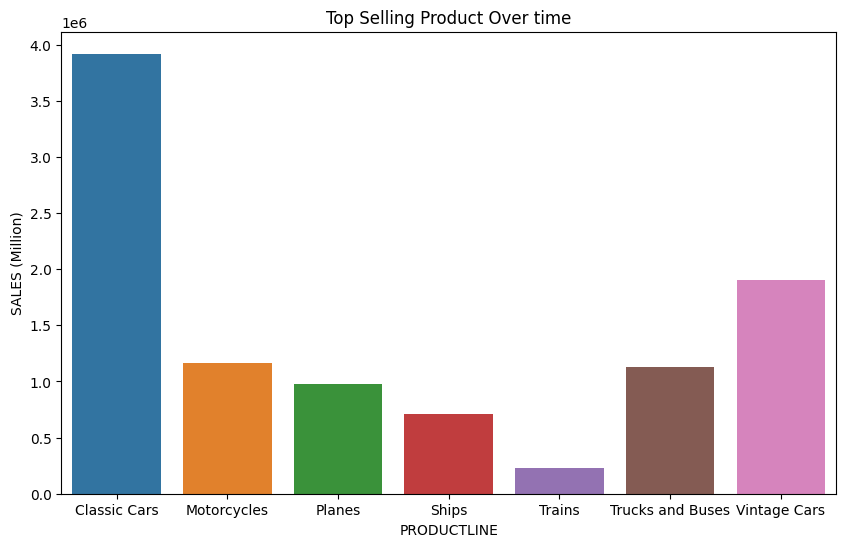

In [13]:
plt.figure(figsize=(10,6))

ax=sns.barplot(x='PRODUCTLINE',y='SALES',data=top_prod, hue='PRODUCTLINE')

plt.title('Top Selling Product Over time')
plt.ylabel('SALES (Million)')
plt.show()

- #### Price Impact

Let's analyze how the PRICEEACH affects the QUANTITYORDERED and SALES.

In [14]:
df.groupby(['PRODUCTLINE','PRICEEACH']).agg({'QUANTITYORDERED':'sum','SALES':'sum'}).reset_index()

,PRODUCTLINE,PRICEEACH,QUANTITYORDERED,SALES
0,Classic Cars,28.29,32,905.28
1,Classic Cars,29.70,42,1247.40
2,Classic Cars,30.06,63,1893.78
3,Classic Cars,30.59,30,917.70
4,Classic Cars,30.96,39,1207.44
...,...,...,...,...
1155,Vintage Cars,98.99,31,3068.69
1156,Vintage Cars,99.52,27,2687.04
1157,Vintage Cars,99.66,33,3288.78
1158,Vintage Cars,99.69,29,2891.01


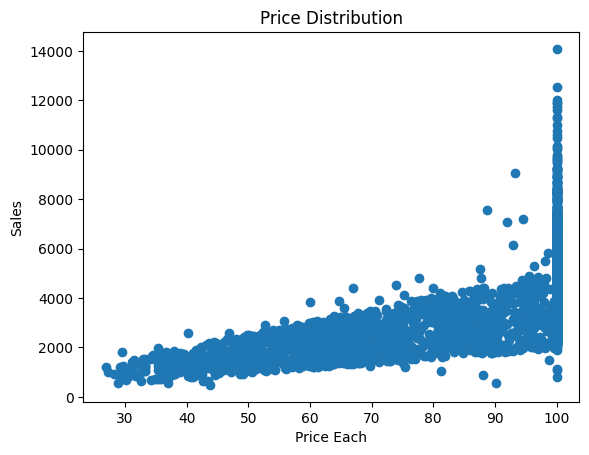

The correlation between each product and sales is: 0.66


In [15]:
# visualize the correlation between each price and sales
plt.scatter(df['PRICEEACH'], df['SALES'])
plt.title('Price Distribution')
plt.xlabel('Price Each')
plt.ylabel('Sales')
plt.show()

# correlation 
corr=df['PRICEEACH'].corr(df['SALES'])
print(f'The correlation between each product and sales is: {corr:.2f}')

The price of each product is moderately correlated with the sales. This means that despite the high price of some the products, the quantity ordered is still relatively high, leading to higher sales. Also, majority of the order recieved are those of $100 each.

#### Q3. Geographical Insights: Regional Performance 

In [47]:
# 
country = df.groupby(['COUNTRY'])['SALES'].sum().reset_index().sort_values('SALES', ascending=False)
country_short = ['AUS','AUT','BEL','CAN','DNK','FIN','FRA','DEU','IRL','ITA','JPN','NOR','PHL','SGP','ESP','SWE','SWIZ','UK','USA']
country['iso_alpha'] = country_short
country

,COUNTRY,SALES,iso_alpha
18,USA,3627982.83,AUS
14,Spain,1215686.92,AUT
6,France,1110916.52,BEL
0,Australia,630623.10,CAN
17,UK,478880.46,DNK
9,Italy,374674.31,FIN
5,Finland,329581.91,FRA
11,Norway,307463.70,DEU
13,Singapore,288488.41,IRL
4,Denmark,245637.15,ITA


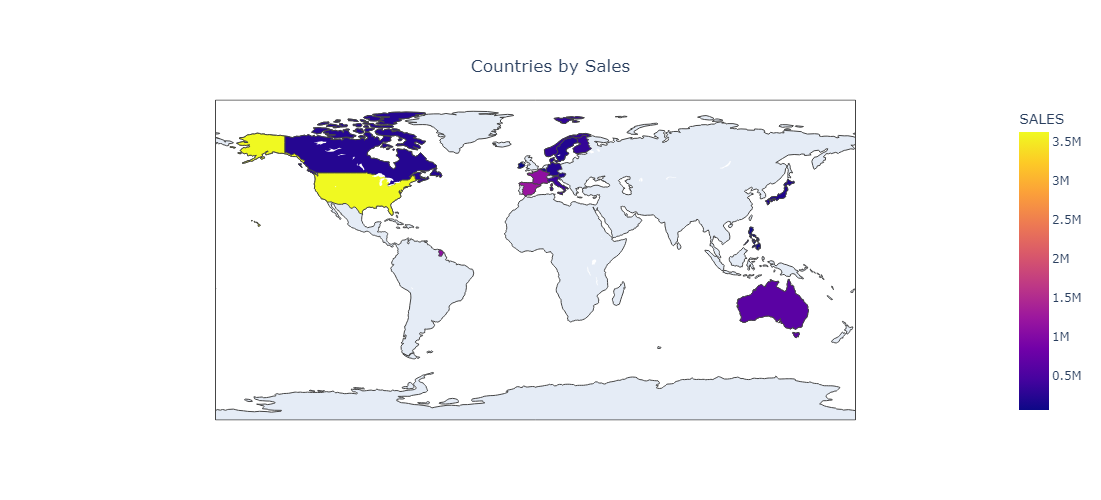

<Figure size 800x600 with 0 Axes>

In [46]:
plt.figure(figsize=(8,6))

fig = px.choropleth(country, 
                    locations="iso_alpha", 
                    color="SALES",
                    hover_name="COUNTRY", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Sales by Country")


# Update the map layout to enlarge the map
fig.update_layout(
    width=1000,  # Set the width of the figure
    height=500,  # Set the height of the figure
    title=dict(
        text="Countries by Sales ",
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=0.9,
        pad={'b': 60}
    )
)

fig.show()


The map shows that majority of the sales are sold in USA, about 3.9 million

#### Q4. Sales Distribution: Order Quantity Distribution and Revenue Distribution

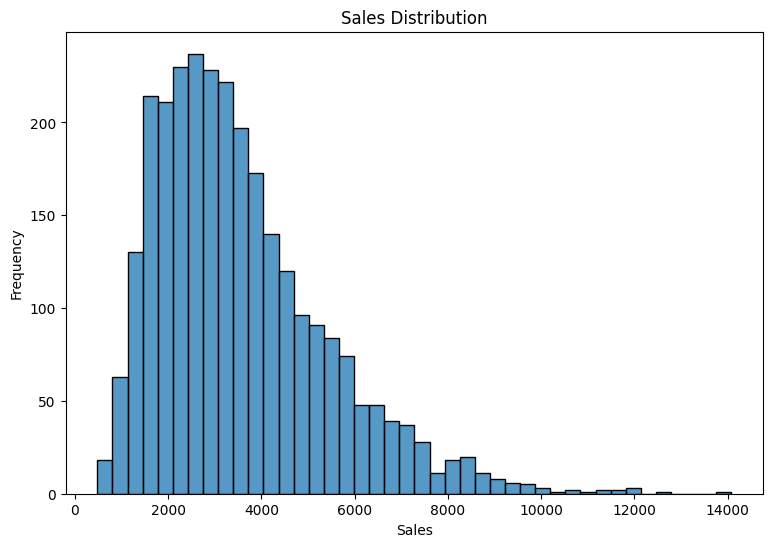

In [34]:
# visualize the sales distribution over time
plt.figure(figsize=(9,6))

ax= sns.histplot(df['SALES'])

plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

The sales distribution is right skewed. The distribution shows that majority of the sales are between $1500 to $4000. Let's reduce the skewness by log transformation.

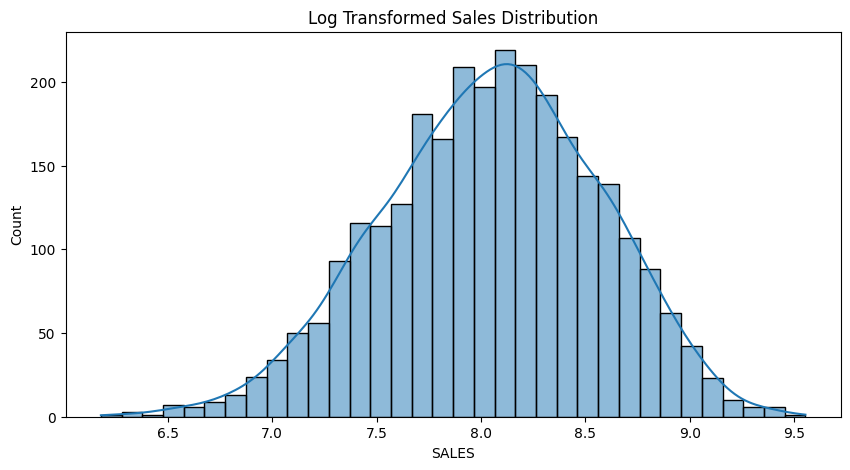

In [43]:
plt.figure(figsize=(10,5))

data= np.log(df['SALES']+1)

# Visualize the transformed distribution
sns.histplot(data, kde=True)
plt.title('Log Transformed Sales Distribution')
plt.show()

The transformed sales distribution is almost a normal distribution.

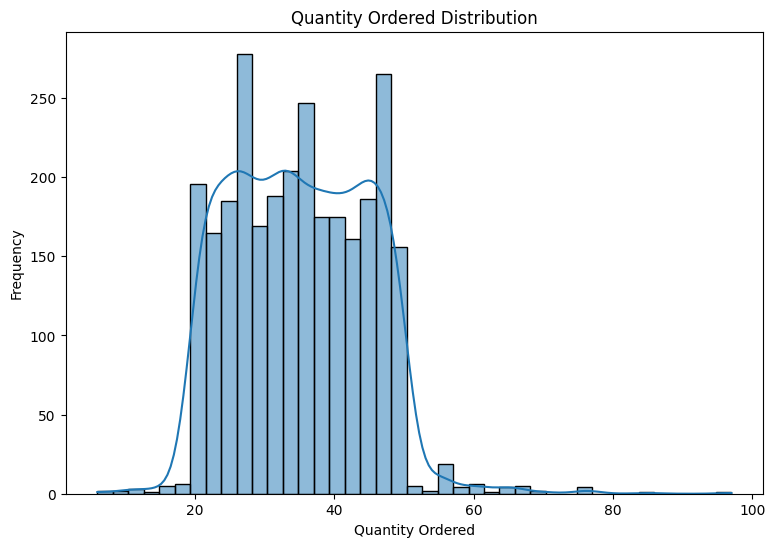

In [45]:
# visualize the Quantity Ordered distribution over time
plt.figure(figsize=(9,6))

ax= sns.histplot(df['QUANTITYORDERED'], kde=True)

plt.title('Quantity Ordered Distribution')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()

Most of the product quantity ordered ranges from 20 to 50 